针对 Fashion MNIST 为数据集，使用 Sequential API 构建一个图片分类模型

Fashion MNIST 和 MNIST 有相同的格式（70,000 个28*28 像素的灰度图片），但是内容不是数字，而是一些流行物，分类难度更大。

## 使用 Keras 载入数据

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

图像以 25*25 数组保存，而不是 1D 数组；
像素值在 0 到 255 之间。

In [2]:
X_train_full.shape

(60000, 28, 28)

In [3]:
X_train_full.dtype

dtype('uint8')

另外数据虽然分成了训练集和测试集，但是没有验证集。

要使用梯度下降，我们要讲输入 features 缩放到 0-1 之间。

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Fasion MNIST 数据集也包含 10 类，和索引 0-9 的对应关系如下

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover",
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

下面用 matplotlib 将图画出来

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

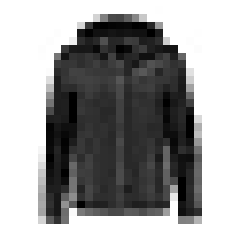

In [8]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

## 使用 Sequential API 创建模型

```py
model = keras.models.Sequential()  # 创建 `Sequential` 模型
# Flatten 层，将输入转换为 1D 数组，即 `x.reshape(-1, 1)`，由于是第一层，所以要指定 `input_shape`
# 也可以使用 `keras.layers.InputLayer`，并设置 `input_shape=[28, 28]`
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 指定激活函数 'relu'，等价于 `activation=keras.activations.relu`
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
# 输出层，10 个 neurons 对应 10 个类别
model.add(keras.layers.Dense(10, activation='softmax'))
```

In [9]:
# 除了逐层添加，也可以一次性创建好
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model 的 `summary` 方法可以显示模型的所有 layers，包括名称，输出 shape，以及参数量

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


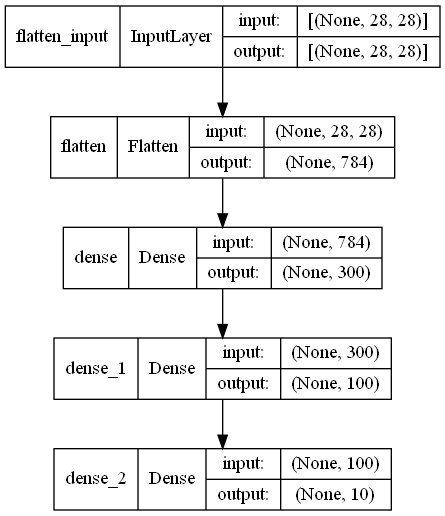

In [11]:
keras.utils.plot_model(model, 'my_fashion_mnist_model.png', show_shapes=True)

可以看到 `Dense` 层包含许多参数。如第一个 hidden layer 包含 784*300=235,200 个连接权重，和 300 个 bias，共235,500 个参数。

参数越多，过拟合的风险越大。

构建模型后，可以很容易查询模型的 layers，如下：

In [12]:
model.layers

In [13]:
# 可以通过索引访问
hidden1 = model.layers[1]

In [14]:
hidden1.name

'dense'

In [15]:
# 也可以通过 name 访问
model.get_layer('dense') is hidden1

True

layer 的参数可以通过 `get_weights()` 和 `set_weights()` 方法访问。对 `Dense` 层，包括 weights 和 bias

In [16]:
weights, biases = hidden1.get_weights()

In [17]:
weights

array([[-0.00953523, -0.02269929,  0.00105771, ..., -0.02674153,
         0.03758607,  0.03054535],
       [-0.05519588, -0.05535181,  0.00330199, ..., -0.04246996,
         0.00369135,  0.06571314],
       [-0.06106026, -0.0015475 ,  0.03017057, ..., -0.0317886 ,
         0.01584593,  0.06358309],
       ...,
       [ 0.061593  ,  0.01135992,  0.05187529, ..., -0.00485558,
         0.00212063, -0.06134608],
       [ 0.0133152 ,  0.01042148, -0.03118212, ...,  0.03519713,
         0.05557658, -0.01433082],
       [-0.00573193,  0.04421378, -0.05666526, ..., -0.06515071,
         0.00080767, -0.01412792]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

从上面可以看到，`Dense` 层的 weights 均随机初始化，为了打破对称性。

`biases` 全部初始化为 0，没有任何问题。

如果需要使用不同的初始化方法，可以在创建 layer 时使用 `kernel_initializer` (kernel 是 weight matrix 的另一种说法)和 `bias_initializer`。

## 编译模型

创建模型后，必须调用 `compile()` 方法编译模型，同时指定 loss function, optimizer，还可以指定额外在 train 和 evalution 期间使用的度量值（metrics）

另外，使用 `loss="sparse_categorical_crossentropy"` 等价于 `loss=keras.losses.sparse_categorical_crossentropy`。

使用 `optimizer="sgd"` 等价于 `optimizer=keras.optimizers.SGD()`

`metrics=["accuracy"]` 等价于 `metrics=[keras.metrics.sparse_categorical_accuracy]`

lr 调节很重要，所以一般通过类的方式调用，如 `optimizer=keras.opptimizers.SGD(lr=???)`

由于是分类模型，所以添加 accuracy 很重要。

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## 训练和评估模型

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7164 - accuracy: 0.7631 - val_loss: 0.5013 - val_accuracy: 0.8314

`fit()` 方法返回 `History` 对象，包含：

- 训练参数 `history.params`
- epochs 列表 `history.epoch`
- 包含每个 epoch 的 loss 和 metrics 的字典对象 `history.history`

下面使用 `history.history` 绘图

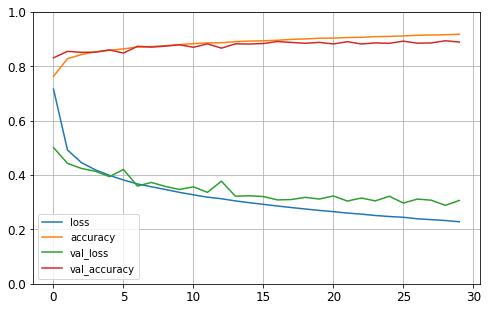

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # 设置 y 轴区间 [0, 1]
plt.show()

如果对模型性能不满意，可以调整超参数。

首先检查 learning rate，如果无效，可以尝试其它 optimizer

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.0614 - accuracy: 0.8461

[66.06143951416016, 0.8460999727249146]

## 使用模型进行预测

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'